<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Group Assignment</strong></h1>
<h2 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Occupancy Estimation</strong></h2>

### <b>Group 10</b>
### <b>Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
### <b>Student Name: Truong Phu Khang ()</b>
### <b>Student Name: </b>

### <b>Course: EEET2485 - Research Method for Engineers</b>
### <b>Lecturer: Dr. Dao Vu Truong Son</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Introduction](#1.1) 

1.2 [Target question for insights](#1.2)

1.3 [Importing Necessary Libraries and datasets](#1.3)

1.4 [Data Retrieving](#1.4)

1.5 [Data information](#1.5)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data preprocessing](#2.2)

> - 2.2.1 [Drop column `ID` and `Insurance`](#2.2.1)
> - 2.2.2 [Rename column `Sepssis`](#2.2.2)  
> - 2.2.3 [Convert `Sepsis` in to binary number](#2.2.3)
> - 2.2.4 [Drop Duplicate](#2.2.4)  
> - 2.2.5 [Convert Data Type](#2.2.5)  

2.3 [Drop column](#2.3)

> - 2.3.1 [Check correllation for dropping](#2.3.1)
> - 2.3.2 [Check missing values for dropping](#2.3.2)  

2.4 [Upper Case the content](#2.4)

2.5 [Extra-whitespaces](#2.5)

2.6 [Descriptive statistics for Central Tendency](#2.6)

> - 2.6.1 [Overview statistics](#2.6.1)
> - 2.6.2 [Domain Knowledge](#2.6.2)  
> - 2.6.3 [Detect Outliers](#2.6.2)  

2.7 [Save The Intermediate Data](#2.8)

<br>

### 3. [Data exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

> - 3.1.1 [Distribution of Sepsis](#3.1.1) 
> - 3.1.2 [Proportion of Sepsis](#3.1.1) 

3.2 [Frequency of each corresponiding Target variable type](#3.2)

> - 3.2.1 [How old are they?](#3.2.1) 
> - 3.2.2 [How much they weight?](#3.2.2) 
> - 3.2.3 [How high PL (Blood Work Result-1 (mu U/ml)) that the Sepsis is likely to get?](#3.2.3) 
> - 3.2.4 [How high PR ((Blood Pressure (mm Hg)) that the Sepsis is likely to get?](#3.2.4) 
> - 3.2.5 [How high SK (Blood Work Result-2 (mm) that the Sepsis is likely to get?](#3.2.5) 
> - 3.2.6 [How high TS (Blood Work Result-3 (mu U/ml)) that the Sepsis is likely to get?](#3.2.6) 
> - 3.2.7 [How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?](#3.2.7) 
> - 3.2.8 [How high BD2 (Blood Work Result-4 (mu U/ml)) that the Sepsis is likely to get?](#3.2.8) 
> - 3.2.9 [Scatter matrix](#3.2.8) 

3.3 [Statistical Test for Correlation](#3.3)

3.4 [Summary](#3.3)

<br>

### 4. [Feature Engineering](#4)

4.1 [Class Imbalancing](#4.1)

4.2 [Splitting the training data](#4.2)

4.3 [Feature Scaling](#4.3)



<br>

### 5. [Model Building](#5) 

5.1 [Logistic Regression](#5.1)

> - 5.1.1 [Train Model](#5.1.1)
> - 5.1.2 [Model Evaluation](#5.1.2)
> - 5.1.3 [Hypertuning parameter](#5.1.3)
> - 5.1.4 [Retrain](#5.1.4)
> - 5.1.5 [Conclusion](#5.1.5)

5.2 [Decision Tree](#5.2)

> - 5.2.1 [Train Model](#5.2.1)
> - 5.2.2 [Hypertuning & Pruning](#5.2.2)

> - 5.2.2.a [Post-Pruning](#5.2.2.a)
> - 5.2.2.b [Pre-Pruning](#5.2.2.b)
> - 5.2.2.c [Hypertuning parameter](#5.2.2.c)

> - 5.2.3 [Hypertuning parameter](#5.2.3)
> - 5.2.4 [Conclusion](#5.2.3)

5.3 [Random Forest](#5.3)

> - 5.3.1 [Train Model](#5.3.1)
> - 5.3.2 [Model Evaluation](#5.3.2)
> - 5.3.3 [Hypertuning parameter](#5.3.3)
> - 5.3.4 [Retrain](#5.3.4)
> - 5.3.5 [Conclusion](#5.3.5)

<br>

### 6. [Conculsions](#5)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> In this modern world, technology play an important role in making any objects to be smarter. In this project, our group will analysis a system called Room Occupancy Estimation. This system will create a standard for smart building in near future. This system will assist building managers or hotel managers to acknowledge number of rooms being used at the moment and number of rooms is currently empty. By using multiple sensors like temperature, lights, sound, CO2. With multiple devices being used in this system, IoT will be employed and most importantly, all these devices must be energy efficient and low cost. Therefore, these devices will need to be saving energy for less battery consuming. Moreover, our group is going to analyst data in this project, to see efficintcy of the system .</p>

## 📣 What will you get after this notebook?

<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Factors that reflect </li>
</ul>

<a id="1.2"></a>
# ️🎯 1.2 Target question for insights
****
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Which <span style="color:#122ecc;">Time </span> the <span style="color:#122ecc;">temperature, light, sound, CO2 and digital passive infrared (PIR) </span> reach the highest values?</li>

</ul>

<a id="1.3"></a>
# ✴️ 1.3 Importing Necessary Libraries and datasets
****

In [1]:
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install graphviz
!{sys.executable} -m pip -q install researchpy
!{sys.executable} -m pip -q install imbalanced-learn

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
import missingno as msno


#for plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= 20,15

#Libraries for plotting
# Modules for data visualization
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix

## Check numpy and pandas version

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.22.3
Pandas version:  1.3.4
Python 3.9.7


### ------------> OBSERVATION
***
I want to check the numpy and pandas version since I want to make sure the verson is appropriate for my work load. Currently, it is still appropriate

<a id="1.4"></a>
# 📲 1.4 Data Retrieving
***


In [3]:
df = pd.read_csv("Data/Occupancy_Estimation.csv", delimiter=',', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (10129, 19)


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1


<a id="1.5"></a>
# 🔈 1.5 Data Information
****
I want to have an overall look on both of the train and test dataset, so I use .shape and .info() function in python to do that.

In [4]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(10129, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2       

### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total record is 10129 with no missing and it has 19 columns with the target variable `Room_Occupancy_Count.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
Let's investigate the datatype of the dataset a little bit.
***
**Categorical:** 
            
- **Ordinal** (just like nominal datatype but can be ordered or ranked)
> - **Date** YYYY/MM/DD: the date of the experiment
> - **Time**: the time of the experiment
> - **Room_Occupancy_Count**: Ground Truth

***
**Numeric:**
- **Discrete**
>  - **pctid** : Cooler Fan RPM Speed Percentage ID (20 means 20%, and so on).
  
- **Continous**
    >  - **S1_Temp**: Sensor nodes 1 temperature
    >  - **S2_Temp**: Sensor nodes 2 temperature
    >  - **S3_Temp**: Sensor nodes 3 temperature
    >  - **S4_Temp**: Sensor nodes 4 temperature
    >  - **S1_Temp**: Sensor nodes 1 temperature
    >  - **S1_Light**: Sensor nodes 1 light
    >  - **S2_Light**: Sensor nodes 2 light
    >  - **S3_Light**: Sensor nodes 3 light
    >  - **S4_Light**: Sensor nodes 4 light
    >  - **S1_Sound**: Sensor nodes 1 sound
    >  - **S2_Sound**: Sensor nodes 2 sound
    >  - **S3_Sound**: Sensor nodes 3 sound
    >  - **S4_Sound**: Sensor nodes 4 sound
    >  - **S5_CO2**: Sensor nodes 5 CO2
    >  - **S5_CO2_Slope**: Sensor nodes 1 temperature
    >  - **S6_PIR**: Sensor nodes 1 temperature
    >  - **S7_PIR**: Sensor nodes 1 temperature

<a id="2.2"></a>
# 🦄 2.2 Drop duplicate
***
Firstly, we want to drop duplicate

In [5]:
print ("The shape of the data set before dropping duplicated:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(df.shape))

The shape of the data set before dropping duplicated:(10129, 19)
The shape of the data set after dropping duplicated:(10129, 19)


### ------------> OBSERVATION
***
In our data there is no duplicated values.

<a id="2.3"></a>
# 🗓 2.3 Format date features
***

In [6]:
# # Cast data type of "Date" to datetime data type
# df['Date'] = pd.to_datetime(df['Date'])

# # Get "year" values from "Date" column
# df['year'] = pd.DatetimeIndex(df['Date']).year

# # Get "month" values from "Date" column
# df['month'] = pd.DatetimeIndex(df['Date']).month

# # Get "Day_Of_Week" values from "Date" column
# df['Day_Of_Week'] = df['Date'].dt.day_name()

# df.drop('Date', axis=1, inplace=True)


# df.head()

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Statistical Test </strong></h1>

****

<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">1. Correlation </p>
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">2. Correlation </p>
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">3. Correlation </p>

<a id="3.1"></a>
# 3.1 Correlation between columns

/var/folders/l5/0ygc5m0x66xc7d4v2qzjjv0h0000gn/T/ipykernel_87978/2733726890.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


Text(0.5, 1.03, 'Correlations Among Features')

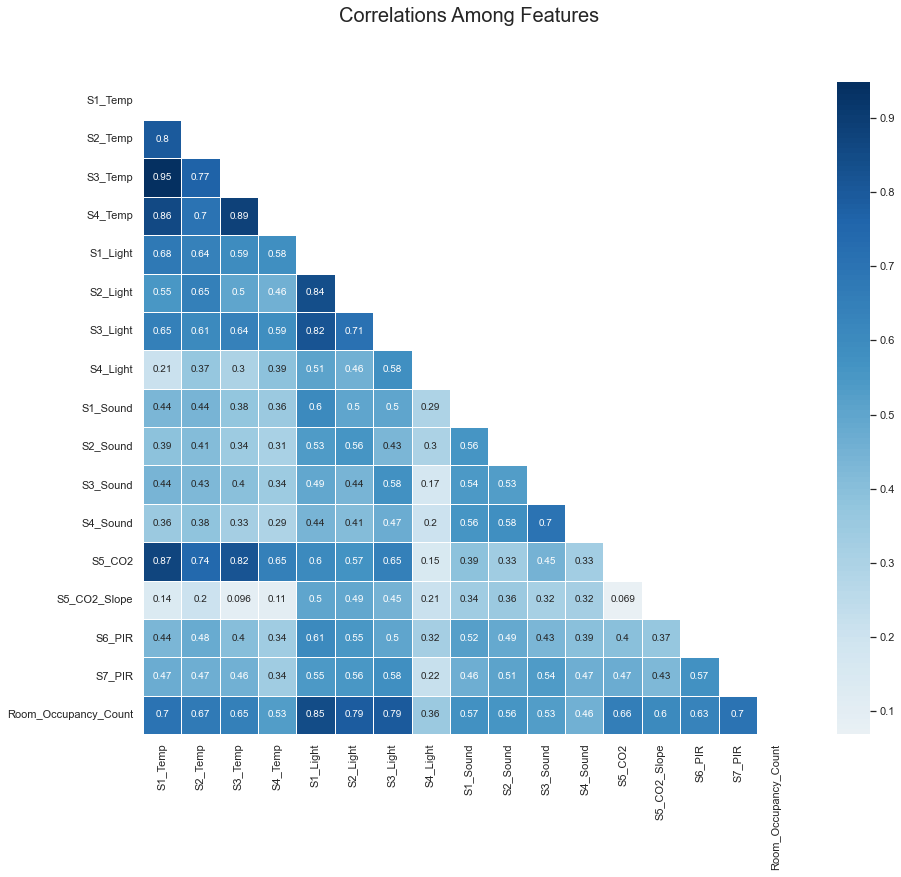

In [7]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), annot=True, mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, linecolor='white', fmt='.2g', center = 0, square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40)

### ------------> OBSERVATION
***
According to this heat meap, there are a lot of multiple correlation between `

## Correlation of the temperature sensors

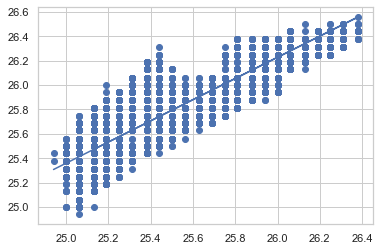

In [19]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(df['S1_Temp'], df['S4_Temp'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, df['S1_Temp']))

plt.scatter(df['S1_Temp'], df['S4_Temp'])
plt.plot(df['S1_Temp'], mymodel)
plt.show()

In [20]:
r

0.8552793011157795

In [21]:
print(myfunc)

<function myfunc at 0x7f9c58a69f70>


In [22]:
intercept

3.668851250975969

In [23]:
slope

0.8676539214796919

In [24]:
p

0.0

In [26]:
print (stats.t.ppf(df['S1_Temp'], df['S4_Temp']))


[nan nan nan ... nan nan nan]
